In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
import tensorflow as tf
print(tf.__version__)

1.2.1


In [3]:
import basic_tf as b

# Load Up Trained Model

In [4]:
filename = "tflstm/iter128_5e-3"

In [5]:
m = b.TSModel(filename, timesteps=b.lstm_timesteps)

INFO:tensorflow:Summary name tflstm/iter128_5e-3/lstm/rnn/multi_rnn_cell/cell_0/lstm_cell/kernel:0 is illegal; using tflstm/iter128_5e-3/lstm/rnn/multi_rnn_cell/cell_0/lstm_cell/kernel_0 instead.
INFO:tensorflow:Summary name tflstm/iter128_5e-3/lstm/rnn/multi_rnn_cell/cell_0/lstm_cell/bias:0 is illegal; using tflstm/iter128_5e-3/lstm/rnn/multi_rnn_cell/cell_0/lstm_cell/bias_0 instead.
INFO:tensorflow:Summary name tflstm/iter128_5e-3/lstm/rnn/multi_rnn_cell/cell_1/lstm_cell/kernel:0 is illegal; using tflstm/iter128_5e-3/lstm/rnn/multi_rnn_cell/cell_1/lstm_cell/kernel_0 instead.
INFO:tensorflow:Summary name tflstm/iter128_5e-3/lstm/rnn/multi_rnn_cell/cell_1/lstm_cell/bias:0 is illegal; using tflstm/iter128_5e-3/lstm/rnn/multi_rnn_cell/cell_1/lstm_cell/bias_0 instead.
INFO:tensorflow:Summary name tflstm/iter128_5e-3/lstm/rnn/multi_rnn_cell/cell_0/lstm_cell/kernel:0 is illegal; using tflstm/iter128_5e-3/lstm/rnn/multi_rnn_cell/cell_0/lstm_cell/kernel_0 instead.
INFO:tensorflow:Summary name

In [6]:
m.load(filename)

INFO:tensorflow:Restoring parameters from tflstm/iter128_5e-3


In [7]:
print(m)

0: Tensor("tflstm/iter128_5e-3/input/Placeholder:0", shape=(?, 100, 1), dtype=float32)

1: Tensor("tflstm/iter128_5e-3/lstm/rnn/transpose:0", shape=(?, 100, 1), dtype=float32)


#  Test Some Predictions

In [8]:
from singen import SinGen

In [9]:
g = SinGen(timesteps=b.lstm_timesteps)

In [10]:
x, y = g.batch()

In [11]:
y_ = m.predict(x)

In [12]:
res = pd.DataFrame({"predict": y_.squeeze(), "actual": y.squeeze()})

In [13]:
plt.style.use('ggplot')

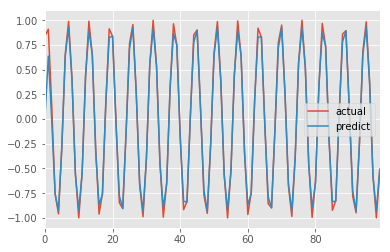

In [14]:
res.plot()

In [15]:
x, y = g.batch()
y_ = m.predict(x)
res = pd.DataFrame({"predict": y_.squeeze(), "actual": y.squeeze()})

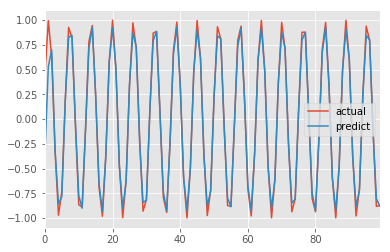

In [16]:
res.plot()

# See How Far It Can Run

In [17]:
figsize=(20, 5)

In [18]:
x, y = g.batch()

In [19]:
def gen_future(count):
    xs = []
    ys = []
    for _ in range(count):
        tx, ty = g.batch()
        xs += [i for i in tx.squeeze()]
        ys += [i for i in ty.squeeze()]
    return xs, ys

In [20]:
def pred_future(xs, count):
    timesteps = xs.shape[1]
    ys = []
    # Each time through this predict loop we get one future element
    for _ in range(count * timesteps):
        xs = m.predict(xs)
        ys += [[i for i in xs.squeeze()][-1]]  # The last one is the only thing new
    return ys

In [21]:
fx, fy = gen_future(2)

In [22]:
pfy = pred_future(x, 2)

# Here is what this looks like ...

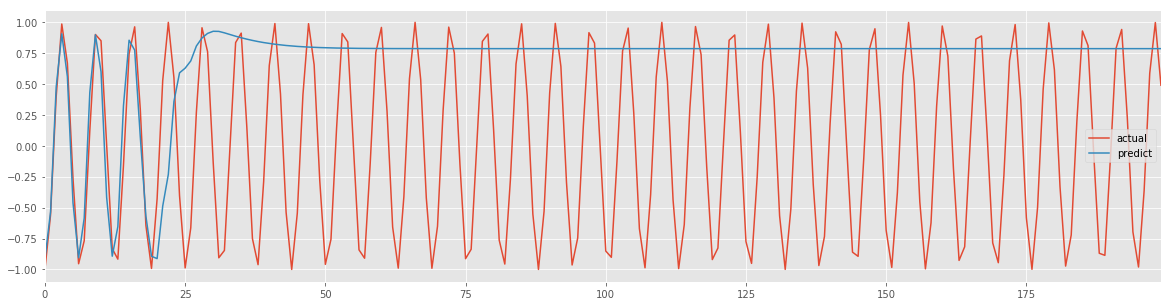

In [23]:
pd.DataFrame({'predict': pfy, 'actual': fx}).plot(figsize=figsize)

In [24]:
showpoints=10

In [25]:
pd.DataFrame({'predict y':pfy[:showpoints], 'gen x':fx[:showpoints]})

,gen x,predict y
0,-0.999756,-0.915339
1,-0.558764,-0.533548
2,0.395953,0.474561
3,0.986633,0.906853
4,0.670207,0.560692
5,-0.262404,-0.460632
6,-0.953762,-0.905334
7,-0.768235,-0.584464
8,0.123603,0.433633
9,0.901801,0.898831
